In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('lung_cancer.csv')

In [ ]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
df.drop(['Name', 'Surname'], axis = 1, inplace = True)

In [ ]:
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [ ]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [ ]:
df.isnull().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [ ]:
ct = df['Result'].astype(bool).sum(axis = 0)

In [ ]:
ct

28

In [ ]:
cf = df['Result'].count()-df['Result'].astype(bool).sum(axis=0)

In [ ]:
cf

31

X = df.iloc[:,0:4].values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y = df['Result'].values

In [ ]:
type(y)

numpy.ndarray

In [ ]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()

In [ ]:
X_ = obj.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(X_,y, test_size = 0.2, random_state=42)

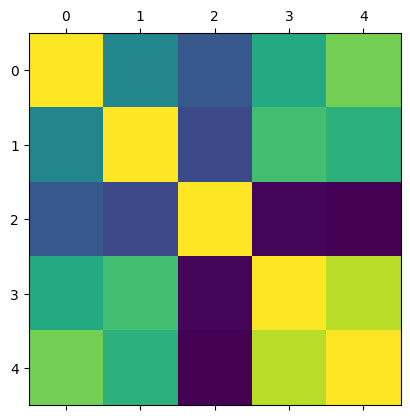

In [ ]:
plt.matshow(df.corr())

In [ ]:
from sklearn.svm import LinearSVC
obj1 = LinearSVC()
obj1.fit(X_train,ytrain)


LinearSVC()

In [ ]:
obj1.score(X_test, ytest)

0.9166666666666666

In [ ]:
ypred = obj1.predict(X_test)

In [ ]:
print(ypred)

[0 0 0 1 0 0 1 0 0 0 1 0]


In [ ]:
confusion_matrix(ytest,ypred)

array([[8, 0],
       [1, 3]])

In [ ]:
confusion_matrix(ytrain, obj1.predict(X_train))

array([[23,  0],
       [ 0, 24]])

In [ ]:
print(obj1.predict(obj.transform([[21,12,4,5]])))

[0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9166666666666666